In [ ]:
# introduction
Clustering algorithms such as K-Modes, K-Means, and Hierarchical Clustering are essential tools in data analysis and machine learning, enabling the grouping of data points based on similarities.

K-Modes Clustering:
Designed for categorical data, K-Modes extends the K-Means algorithm, identifying clusters by minimizing dissimilarities between data points and their respective mode (most frequent value).

K-Means Clustering:
K-Means partitions numerical data into K clusters by iteratively assigning points to the nearest cluster centroid and updating centroids to minimize the sum of squared distances within clusters.

Hierarchical Clustering:
Hierarchical Clustering creates a dendrogram by iteratively merging or splitting clusters based on dissimilarity measures, offering flexibility in exploring data hierarchy without predefining the number of clusters.

In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


import os




# About Dataset
This dataset is to be related to breast cancer diagnosis. It includes various measurements and features extracted from images of cell nuclei present in breast biopsies. Here’s a brief explanation of the columns:

id: Identifier for each record.
diagnosis: Indicates the diagnosis (M = malignant, B = benign).
radius_mean to fractal_dimension_worst: These are various feature measurements including the mean, standard error, and “worst” or largest (mean of the three largest values) of a series of characteristics of the cell nuclei present in the image.
Each row in the dataset represents a unique case or patient. The numerical values represent different aspects and measurements associated with breast cancer tumors. The “diagnosis” column contains categorical data represented by ‘M’ for malignant tumors and ‘B’ for benign tumors. The other columns contain numerical data that are measurements derived from images of cell nuclei present in breast biopsies. These measurements are used in the diagnosis and study of breast cancer. The dataset can be used for various purposes such as training machine learning models for predicting breast cancer diagnosis.

In [3]:
# Read and upload data
data = pd.read_csv("data.csv")

In [4]:
# We don't need id and NaN data.
data.drop(["Unnamed: 32", "id"], axis = 1, inplace = True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
data["diagnosis"].value_counts()

# We have 357 B and 212 M labelled data

B    357
M    212
Name: diagnosis, dtype: int64

In [6]:
# For clustering we do not need labels. Because we'll identify the labels.

dataWithoutLabels = data.drop(["diagnosis"], axis = 1)
dataWithoutLabels.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
dataWithoutLabels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

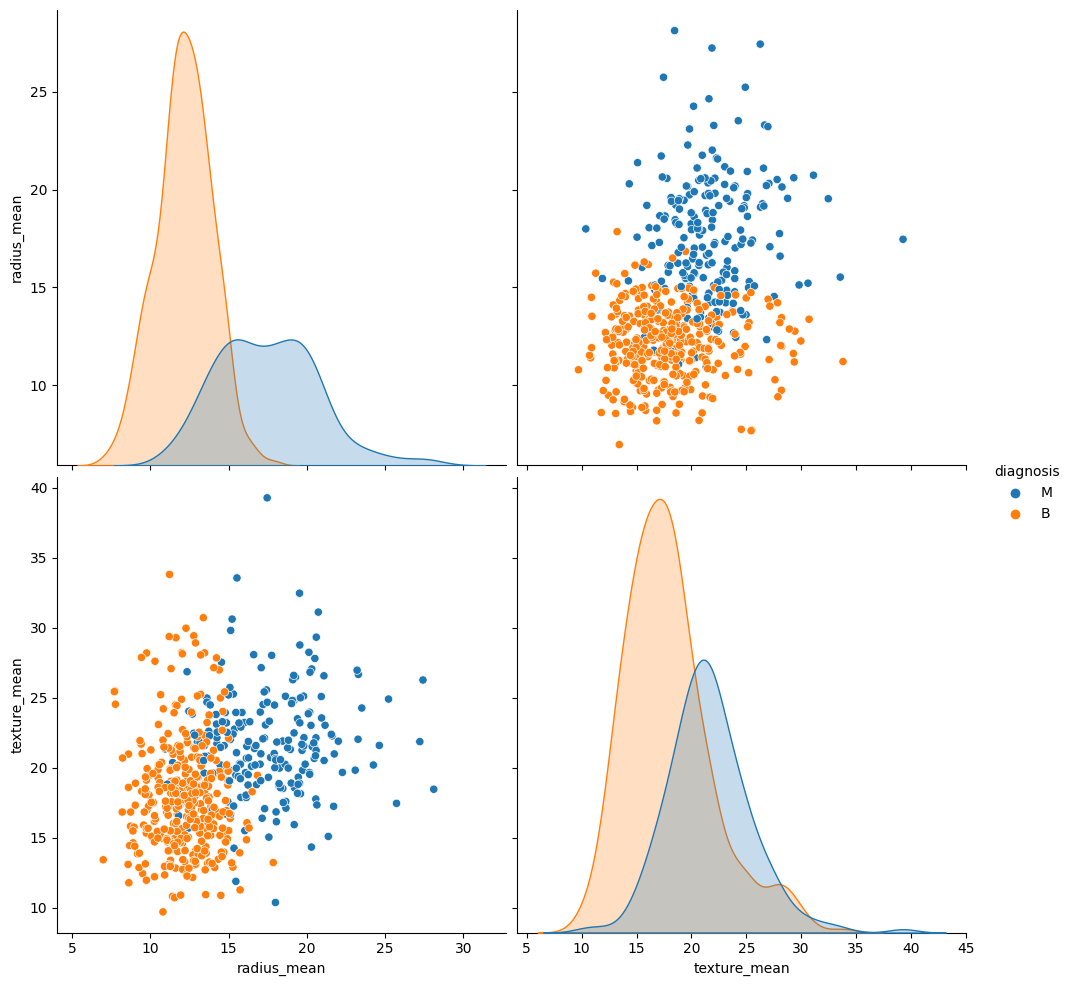

In [8]:
# radius_mean and texture_mean features will be used for clustering. Before clustering process let's check  how our data looks.

sns.pairplot(data.loc[:,['radius_mean','texture_mean', 'diagnosis']], hue = "diagnosis", height = 5)
plt.show()

<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features'}>

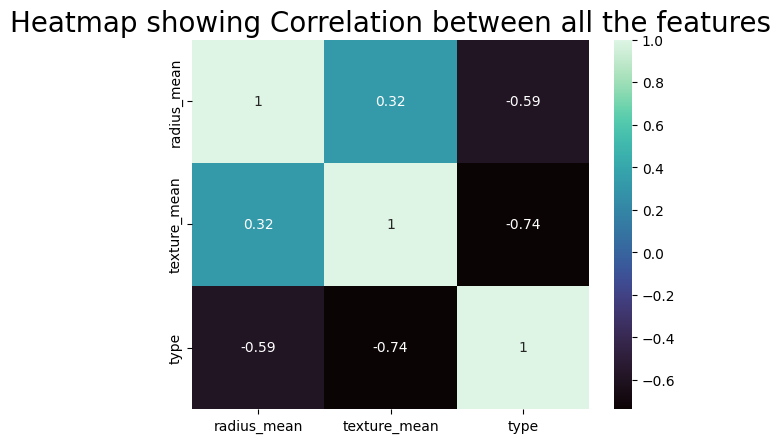

In [25]:
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(dataWithoutLabels.corr(),annot = True, cmap='mako')

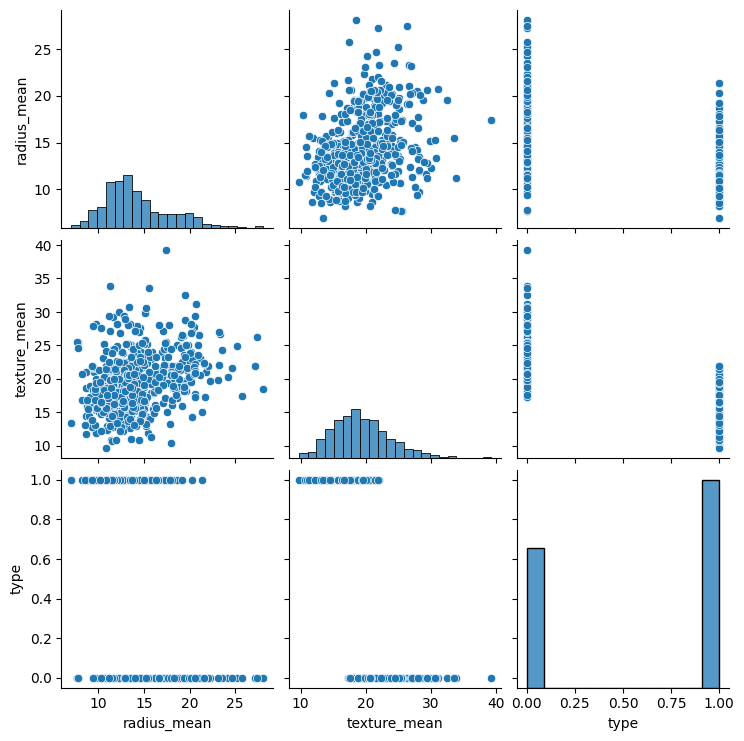

In [26]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(dataWithoutLabels)

<AxesSubplot:>

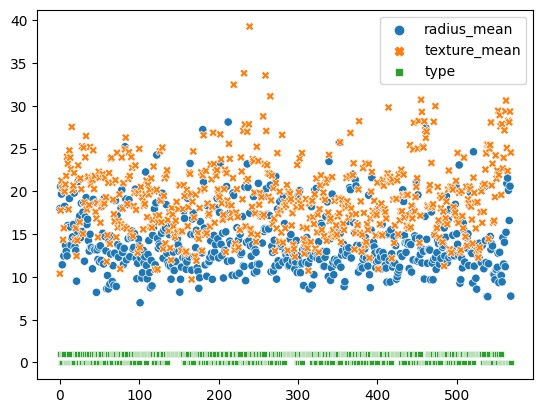

In [27]:
import seaborn
seaborn.scatterplot(data=dataWithoutLabels)

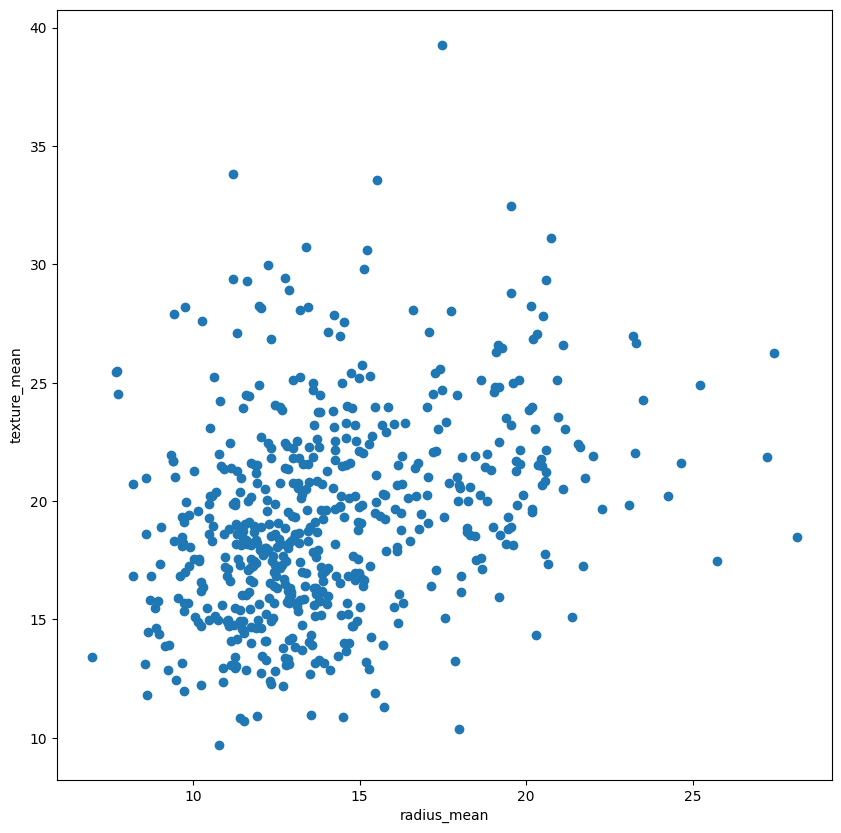

In [9]:
# Our data looks like below plot without diagnosis label

plt.figure(figsize = (10, 10))
plt.scatter(dataWithoutLabels["radius_mean"], dataWithoutLabels["texture_mean"])
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

# K-MEANS CLUSTERING

Define K centers and cluster data,
Assign random centroids,
Cluster data points according to distance from centroids (euclidean distance),



WCSS is a metric used for k value selection process. After this operation elbow rule is used for k value.

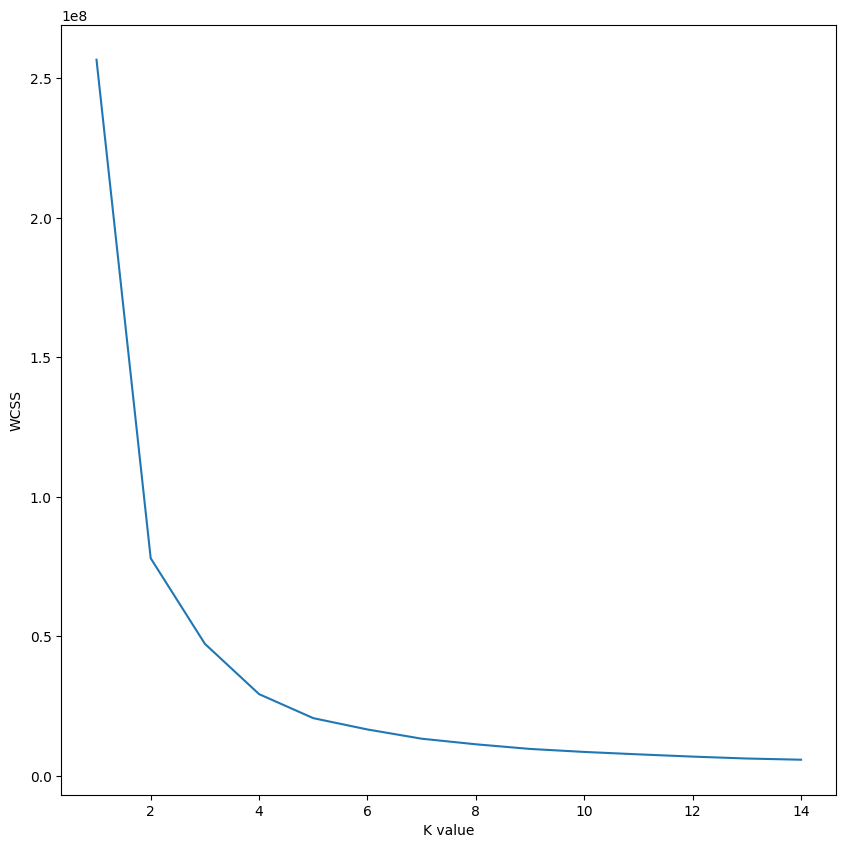

In [10]:
from sklearn.cluster import KMeans
wcss = [] # within cluster sum of squares

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(dataWithoutLabels)
    wcss.append(kmeansForLoop.inertia_)

plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [11]:
# Elbow point starting from 2 

dataWithoutLabels = data.loc[:,['radius_mean','texture_mean']]
kmeans = KMeans(n_clusters = 2)
clusters = kmeans.fit_predict(dataWithoutLabels)
dataWithoutLabels["type"] = clusters
dataWithoutLabels["type"].unique()

array([1, 0])

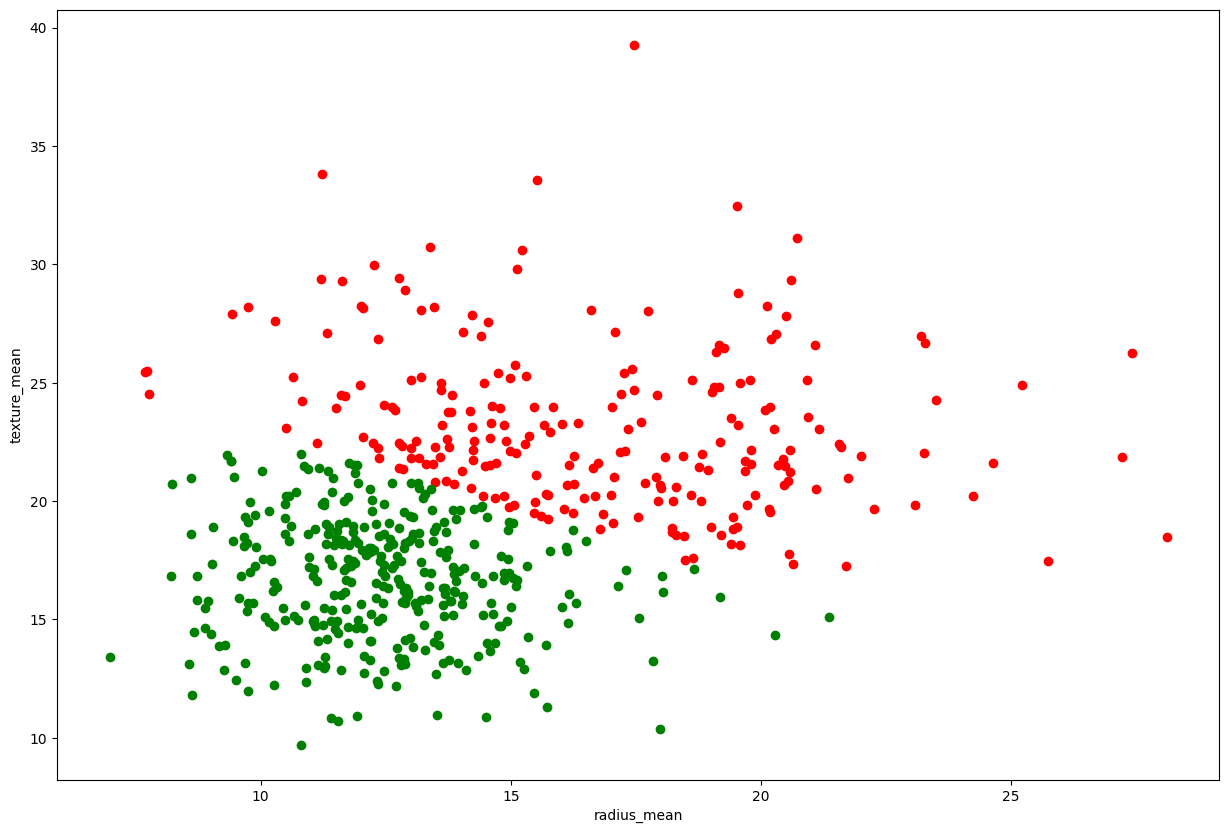

In [12]:
# Plot data after k = 2 clustering

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["radius_mean"][dataWithoutLabels["type"] == 0], dataWithoutLabels["texture_mean"][dataWithoutLabels["type"] == 0], color = "red")
plt.scatter(dataWithoutLabels["radius_mean"][dataWithoutLabels["type"] == 1], dataWithoutLabels["texture_mean"][dataWithoutLabels["type"] == 1], color = "green")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

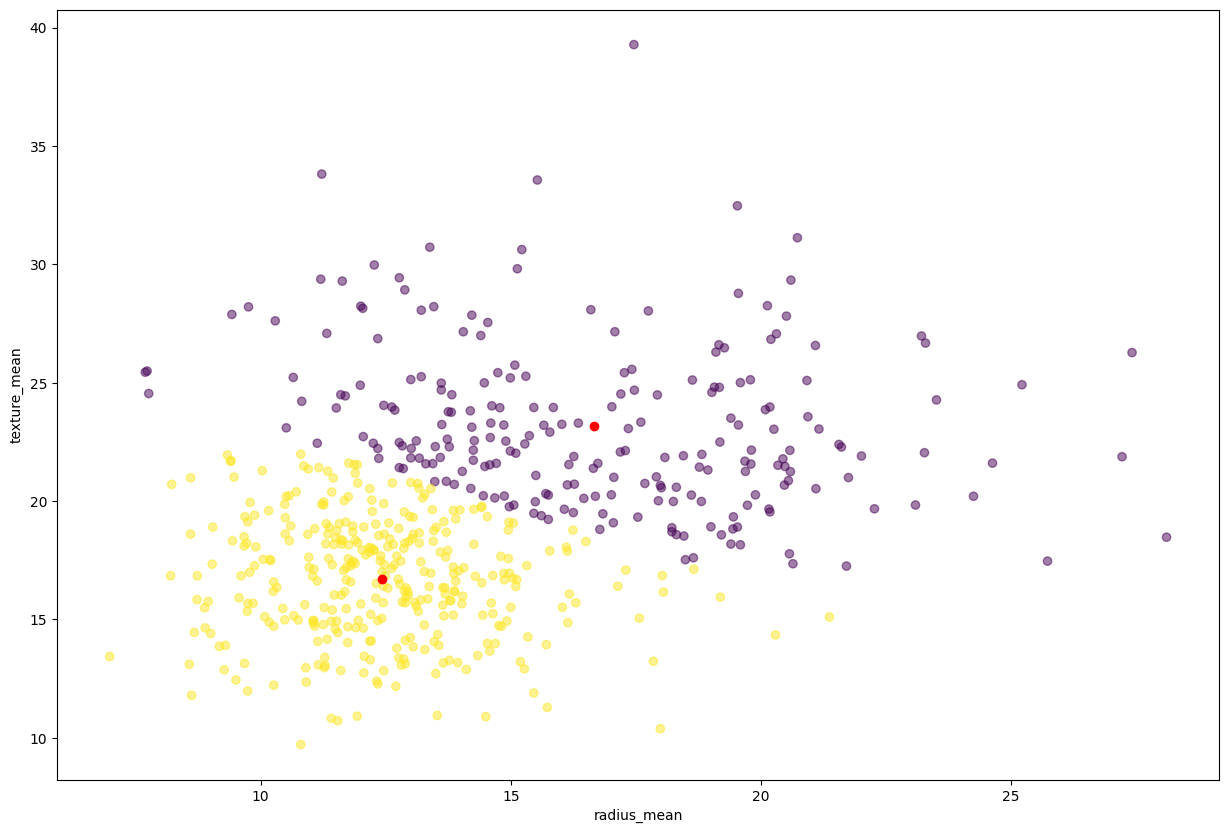

In [13]:
# Data centroids middle of clustered scatters

plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutLabels["radius_mean"], dataWithoutLabels["texture_mean"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = "red", alpha = 1)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

In [14]:
dataWithoutDiagnosis = data.drop(["diagnosis"], axis = 1)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
scalar = StandardScaler()
kmeans = KMeans(n_clusters = 2)
pipe = make_pipeline(scalar, kmeans)
pipe.fit(dataWithoutDiagnosis)
labels = pipe.predict(dataWithoutDiagnosis)
df = pd.DataFrame({'labels': labels, "diagnosis" : data['diagnosis']})
ct = pd.crosstab(df['labels'], df['diagnosis'])
print(ct)

diagnosis    B    M
labels             
0          339   36
1           18  176


# HIERARCHICAL CLUSTERING

Each data point is transformed to cluster,
Create cluster using closest 2 data point,
Create cluster using closest 2 cluster,


Above mentioned distances are euclidean distances
Dendogram is used for n_clusters value detection.

In [15]:
dataWithoutTypes = dataWithoutLabels.drop(["type"], axis = 1)
dataWithoutTypes.head()

,radius_mean,texture_mean
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [20]:
dataWithoutTypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   radius_mean   569 non-null    float64
 1   texture_mean  569 non-null    float64
 2   label         569 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 13.5 KB


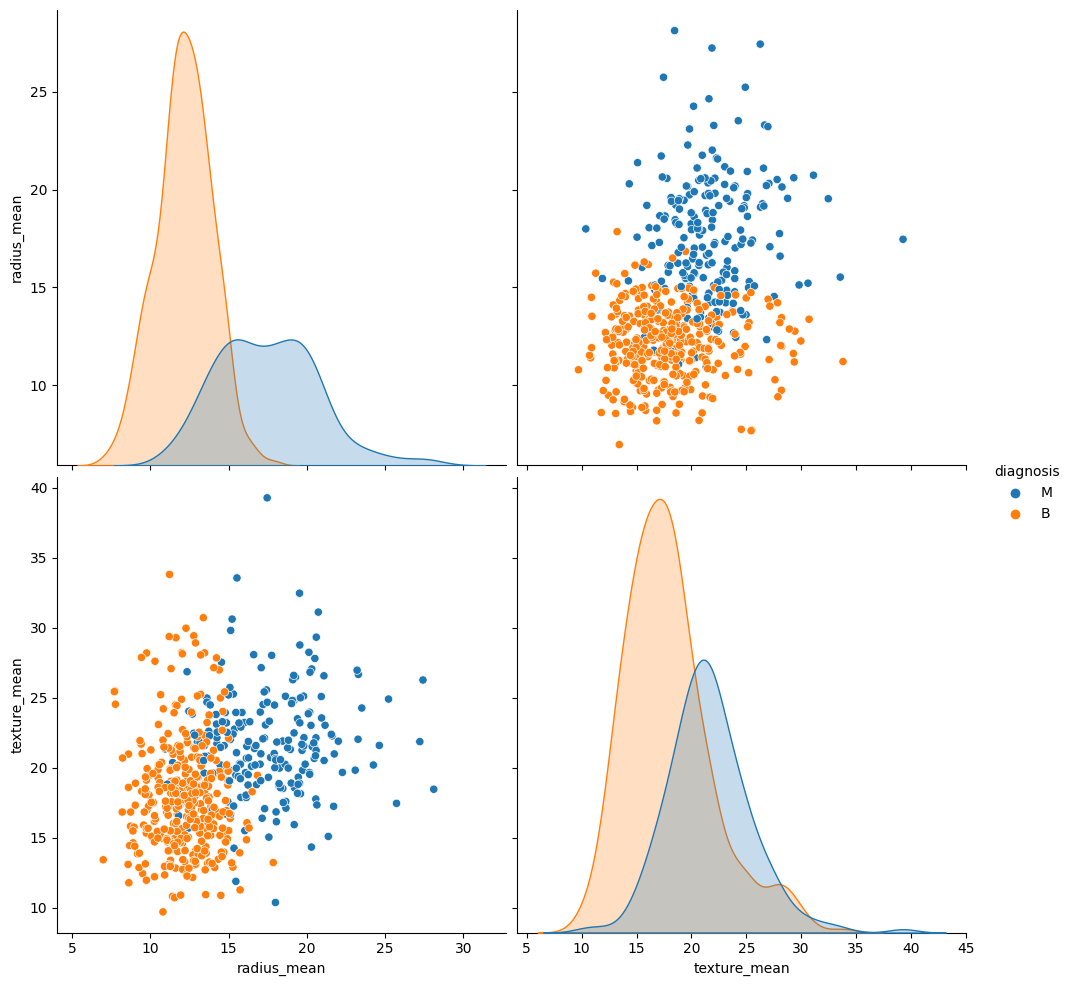

In [21]:
sns.pairplot(data.loc[:,['radius_mean','texture_mean', 'diagnosis']], hue = "diagnosis", height = 5)
plt.show()

<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features'}>

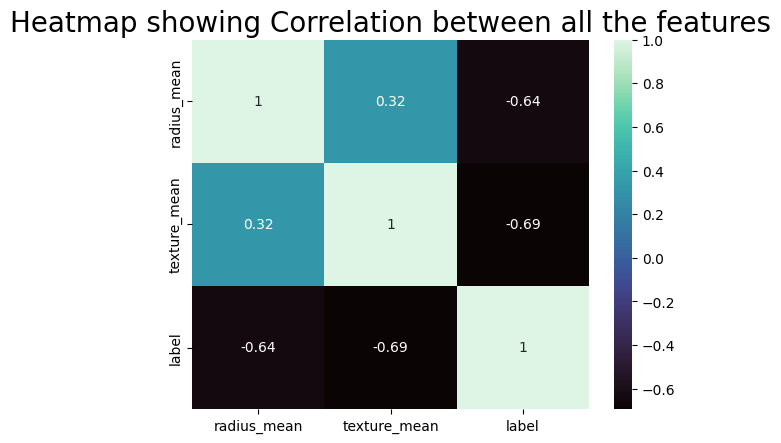

In [22]:
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(dataWithoutTypes.corr(),annot = True, cmap='mako')

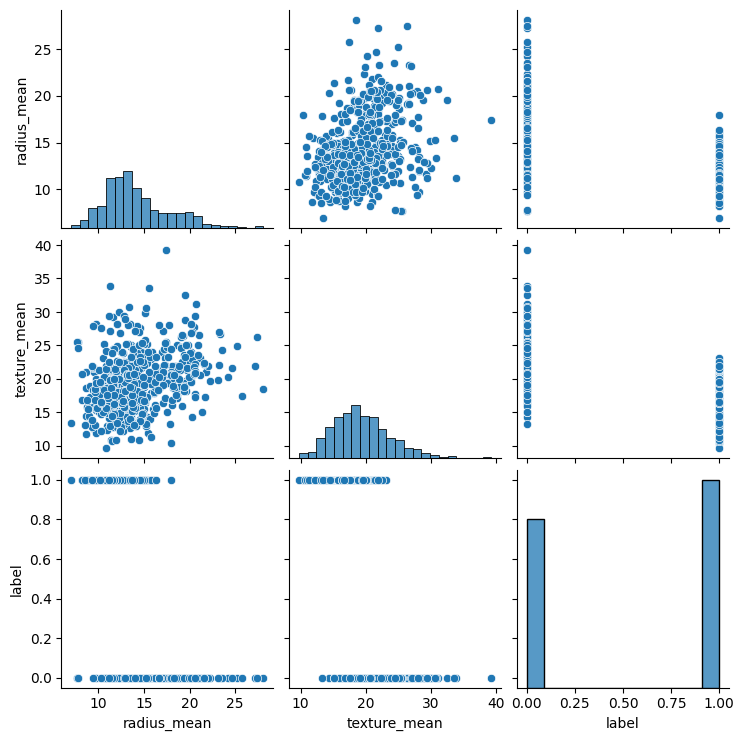

In [24]:
# Visualization of correlation results with seaborn library pairplot
sns.pairplot(dataWithoutTypes)

<AxesSubplot:>

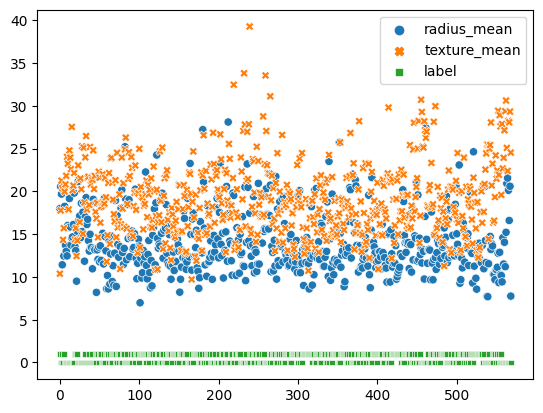

In [28]:
import seaborn
seaborn.scatterplot(data=dataWithoutTypes)

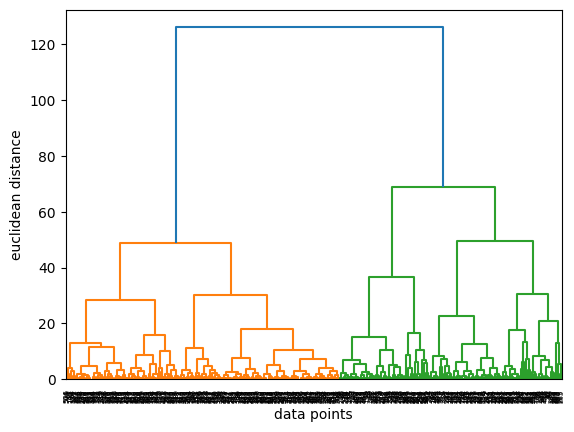

In [16]:
from scipy.cluster.hierarchy import linkage,dendrogram
merg = linkage(dataWithoutTypes, method = "ward")
dendrogram(merg, leaf_rotation = 90)
plt.xlabel("data points")
plt.ylabel("euclidean distance")
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(dataWithoutTypes)
dataWithoutTypes["label"] = cluster

In [18]:
dataWithoutTypes.label.value_counts()

1    314
0    255
Name: label, dtype: int64

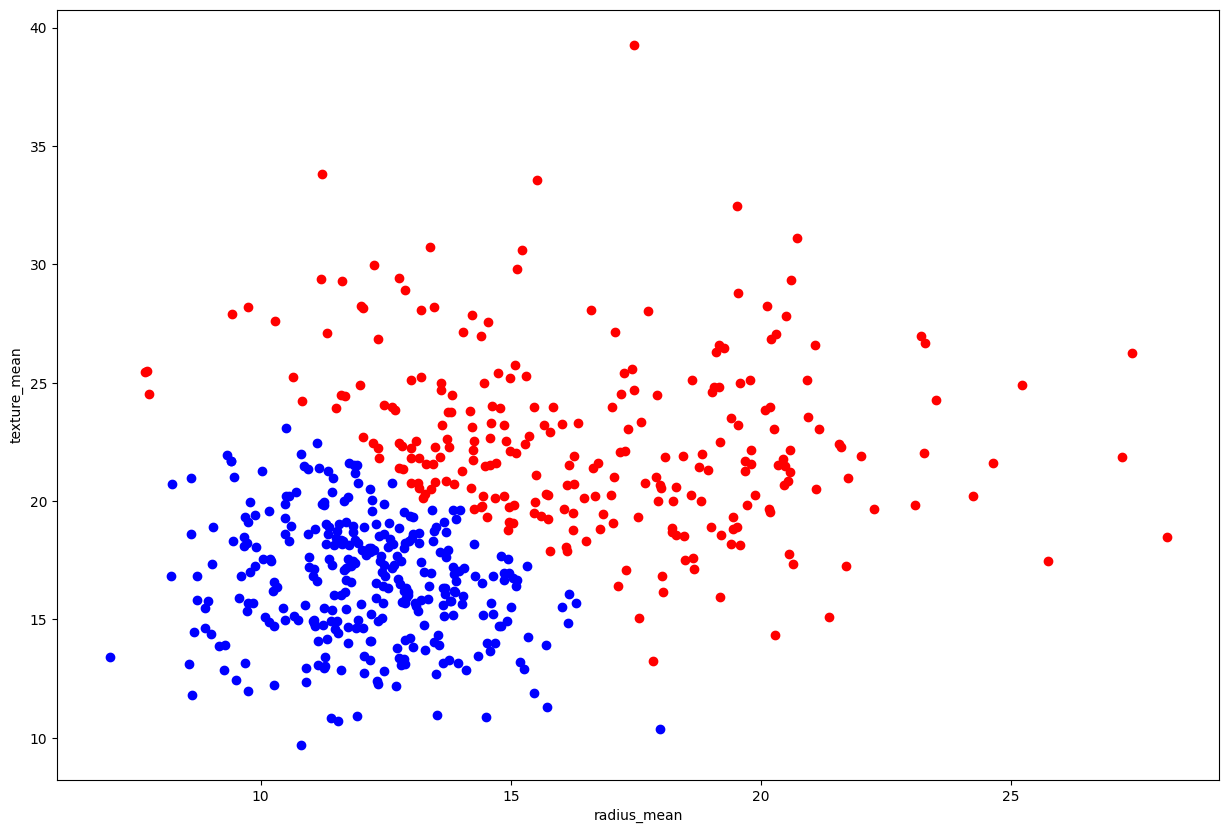

In [19]:
plt.figure(figsize = (15, 10))
plt.scatter(dataWithoutTypes["radius_mean"][dataWithoutTypes.label == 0], dataWithoutTypes["texture_mean"][dataWithoutTypes.label == 0], color = "red")
plt.scatter(dataWithoutTypes["radius_mean"][dataWithoutTypes.label == 1], dataWithoutTypes["texture_mean"][dataWithoutTypes.label == 1], color = "blue")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

Conclusion
We used unsupervised learning algorithms for clustering cancer data. Thank you for reading my kernel. Please do not hesitate to leave comments.

# K-Modes Clustering

In [29]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

# Data Exploration and Describing the dataset

# About Dataset
This dataset is  to be related to a bank’s marketing campaign, possibly for a term deposit. Each row represents a client’s profile and their response to the campaign. Here’s a breakdown of the columns:

age: The age of the client.
job: The type of job the client has.
marital: The marital status of the client.
education: The educational qualification of the client.
default: Indicates whether the client has credit in default.
housing: Indicates whether the client has a housing loan.
loan: Indicates whether the client has a personal loan.
contact: The type of communication contact.
month: The last contact month of the year.
day_of_week: The last contact day of the week.
duration: The last contact duration, in seconds.
campaign: The number of contacts performed during this campaign for this client.
pdays: The number of days that passed by after the client was last contacted from a previous campaign.
previous: The number of contacts performed before this campaign for this client.
poutcome: The outcome of the previous marketing campaign.
emp.var.rate: Employment variation rate - quarterly indicator.
cons.price.idx: Consumer price index - monthly indicator.
cons.conf.idx: Consumer confidence index - monthly indicator.
euribor3m: Euribor 3 month rate - daily indicator.
nr.employed: Number of employees - quarterly indicator.
y: Indicates whether the client has subscribed to a term deposit.

In [30]:
bank = pd.read_csv('bankmarketing.csv')

In [31]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [32]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [33]:
bank_cust = bank[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]

In [34]:
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [68]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   index        41188 non-null  int64   
 1   job          41188 non-null  object  
 2   marital      41188 non-null  object  
 3   education    41188 non-null  object  
 4   default      41188 non-null  object  
 5   housing      41188 non-null  object  
 6   loan         41188 non-null  object  
 7   contact      41188 non-null  object  
 8   month        41188 non-null  object  
 9   day_of_week  41188 non-null  object  
 10  poutcome     41188 non-null  object  
 11  age_bin      41188 non-null  category
dtypes: category(1), int64(1), object(10)
memory usage: 3.5+ MB


In [70]:
bank_cust.describe()

,index
count,41188.00000
mean,20593.50000
std,11890.09578
min,0.00000
25%,10296.75000
50%,20593.50000
75%,30890.25000
max,41187.00000


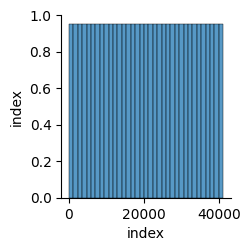

In [71]:
sns.pairplot(bank_cust)

<AxesSubplot:title={'center':'Heatmap showing Correlation between all the features'}>

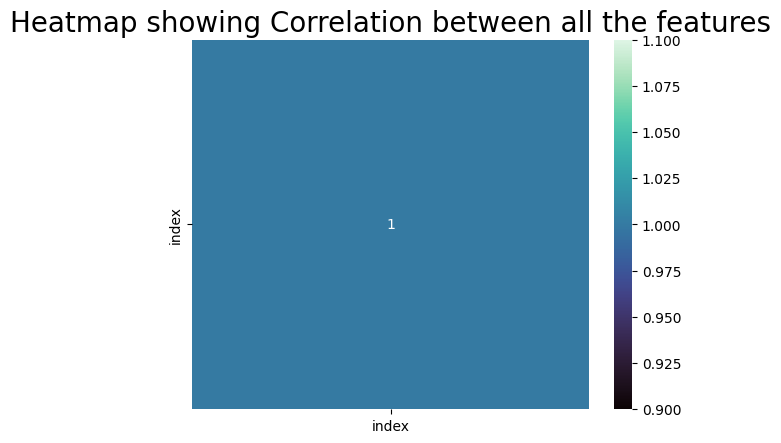

In [72]:
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(bank_cust.corr(),annot = True, cmap='mako')

<AxesSubplot:>

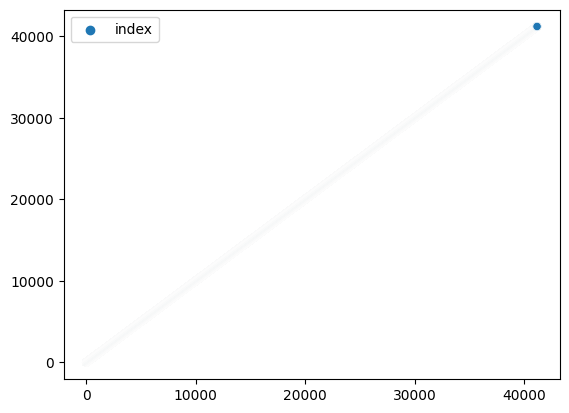

In [73]:
import seaborn
seaborn.scatterplot(data=bank_cust)

In [35]:
bank_cust['age_bin'] = pd.cut(bank_cust['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
bank_cust  = bank_cust.drop('age',axis = 1)

In [36]:
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60


In [37]:
bank_cust.shape

(41188, 11)

In [38]:
bank_cust.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,9
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,30-40
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,16385


In [39]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [40]:
# Checking Null values
bank_cust.isnull().sum()*100/bank_cust.shape[0]
# There are no NULL values in the dataset, hence it is clean.

job            0.0
marital        0.0
education      0.0
default        0.0
housing        0.0
loan           0.0
contact        0.0
month          0.0
day_of_week    0.0
poutcome       0.0
age_bin        0.0
dtype: float64

# Model Building and data preparation

In [41]:
# First we will keep a copy of data
bank_cust_copy = bank_cust.copy()

In [42]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,4
1,7,1,3,1,0,0,1,6,1,1,4
2,7,1,3,0,2,0,1,6,1,1,2
3,0,1,1,0,0,0,1,6,1,1,2
4,7,1,3,0,0,2,1,6,1,1,4


In [44]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: c:\users\hp\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip


In [45]:
# Importing Libraries

from kmodes.kmodes import KModes

# Using K-Mode with "Cao" initialization

In [46]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [47]:
# Predicted Clusters
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [48]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = bank_cust.columns

In [49]:
# Mode of the clusters
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,2
1,1,1,3,0,0,0,1,6,0,1,3


# Using K-Mode with "Huang" initialization

In [50]:
# Using K-Mode with "Huang" initialization
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6729, cost: 200850.0
Run 1, iteration: 2/100, moves: 36, cost: 200850.0


In [51]:
# Predicted clusters
fitClusters_huang

array([0, 0, 0, ..., 0, 0, 0], dtype=uint16)

# Choosing K by comparing Cost against each K

In [52]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


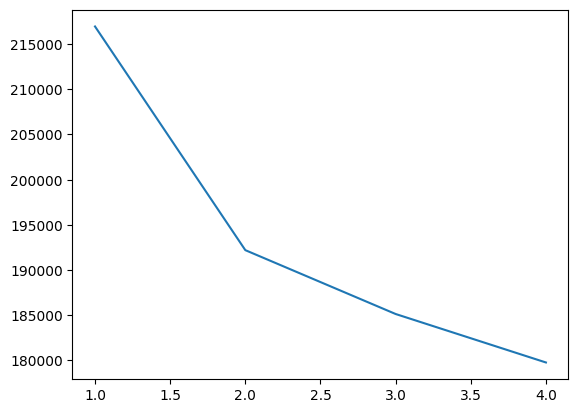

In [53]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [54]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [55]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

# Combining the predicted clusters with the original DF

In [56]:
bank_cust = bank_cust_copy.reset_index()

In [57]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([bank_cust, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [58]:
combinedDf.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,50-60,1
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,50-60,1
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,30-40,0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,30-40,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,50-60,1


# Cluster Identification

In [59]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]

In [60]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                28293 non-null  object  
 1   marital            28293 non-null  object  
 2   education          28293 non-null  object  
 3   default            28293 non-null  object  
 4   housing            28293 non-null  object  
 5   loan               28293 non-null  object  
 6   contact            28293 non-null  object  
 7   month              28293 non-null  object  
 8   day_of_week        28293 non-null  object  
 9   poutcome           28293 non-null  object  
 10  age_bin            28293 non-null  category
 11  cluster_predicted  28293 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 2.5+ MB


In [61]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   job                12895 non-null  object  
 1   marital            12895 non-null  object  
 2   education          12895 non-null  object  
 3   default            12895 non-null  object  
 4   housing            12895 non-null  object  
 5   loan               12895 non-null  object  
 6   contact            12895 non-null  object  
 7   month              12895 non-null  object  
 8   day_of_week        12895 non-null  object  
 9   poutcome           12895 non-null  object  
 10  age_bin            12895 non-null  category
 11  cluster_predicted  12895 non-null  uint16  
dtypes: category(1), object(10), uint16(1)
memory usage: 1.1+ MB


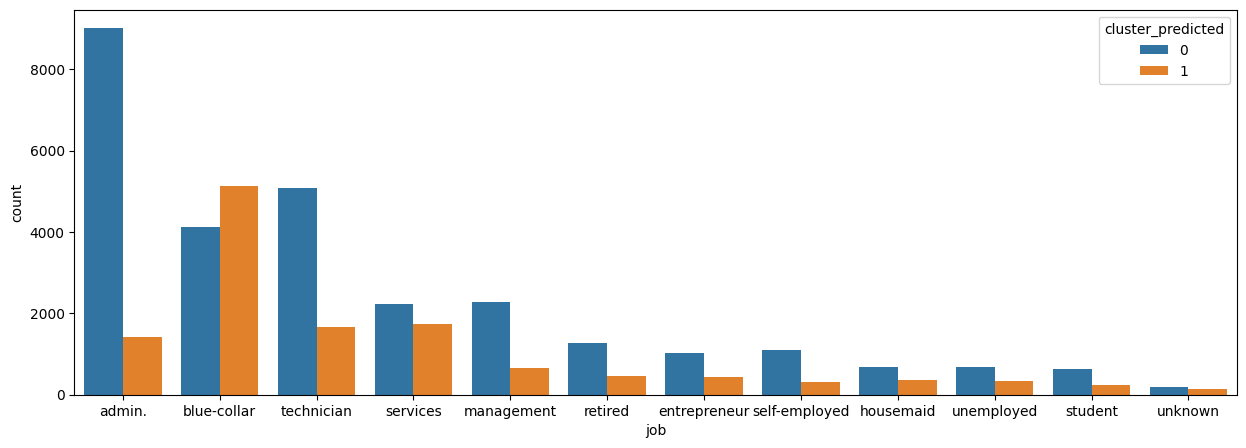

In [62]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['job'],order=combinedDf['job'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

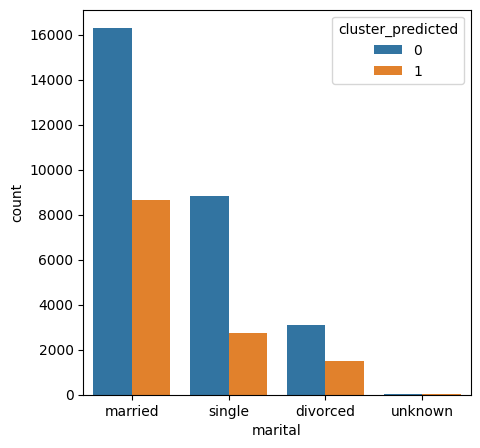

In [63]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

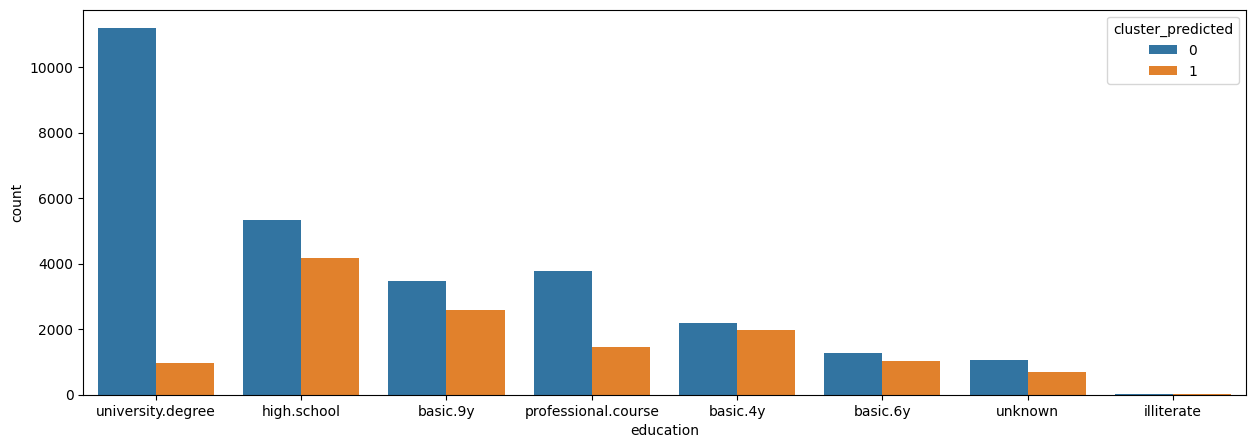

In [64]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

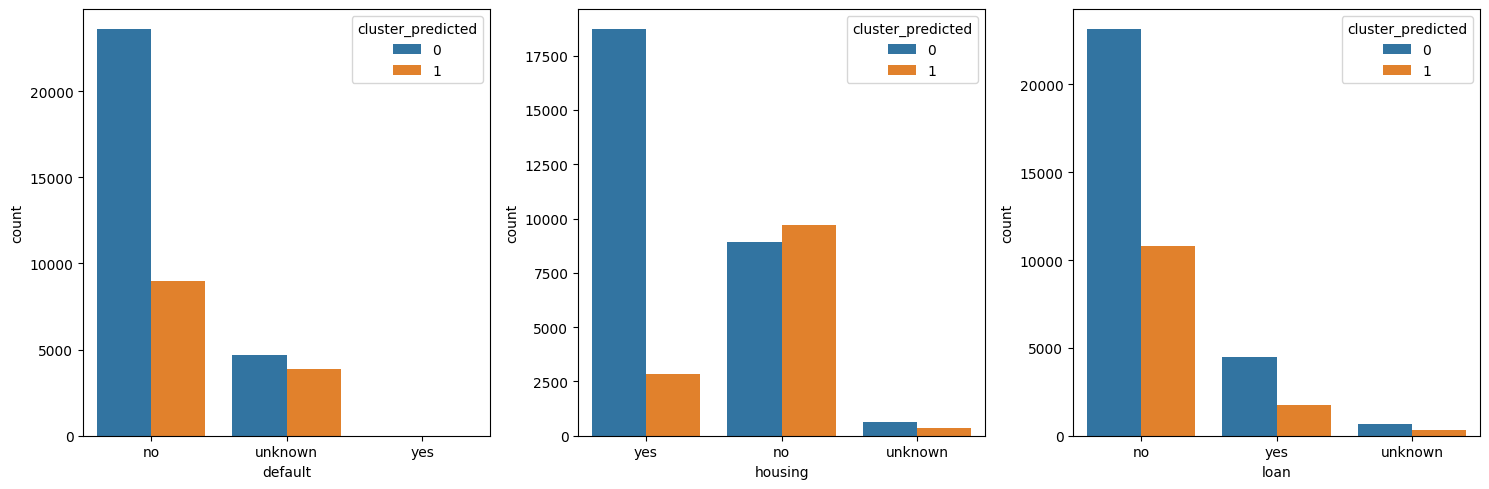

In [65]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing'],order=combinedDf['housing'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['loan'],order=combinedDf['loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

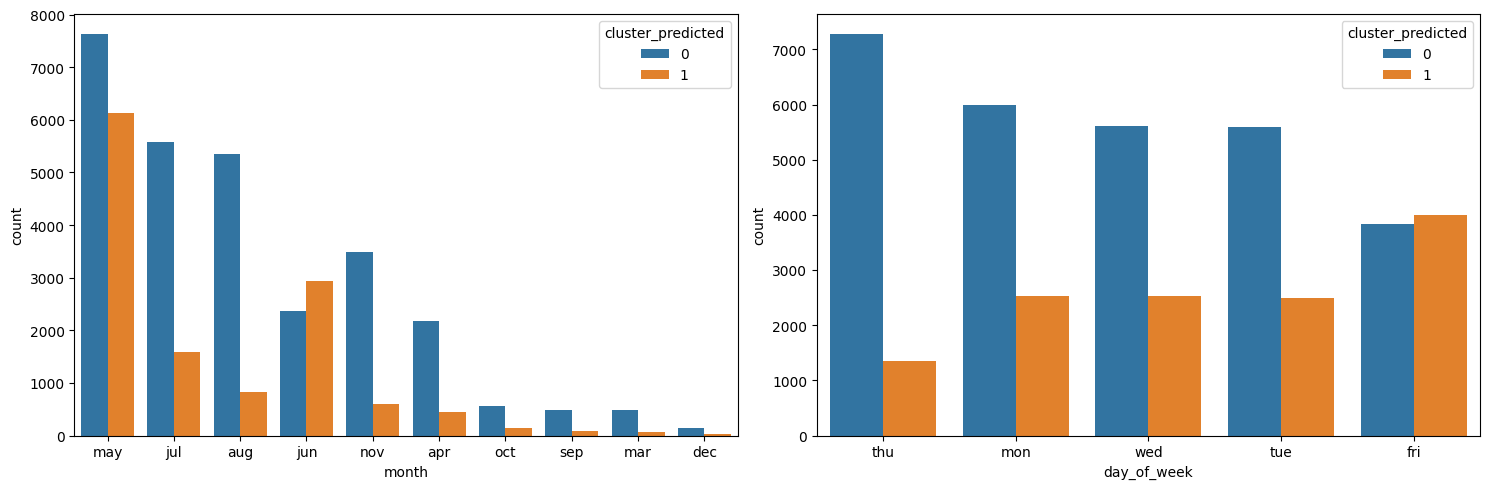

In [66]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day_of_week'],order=combinedDf['day_of_week'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

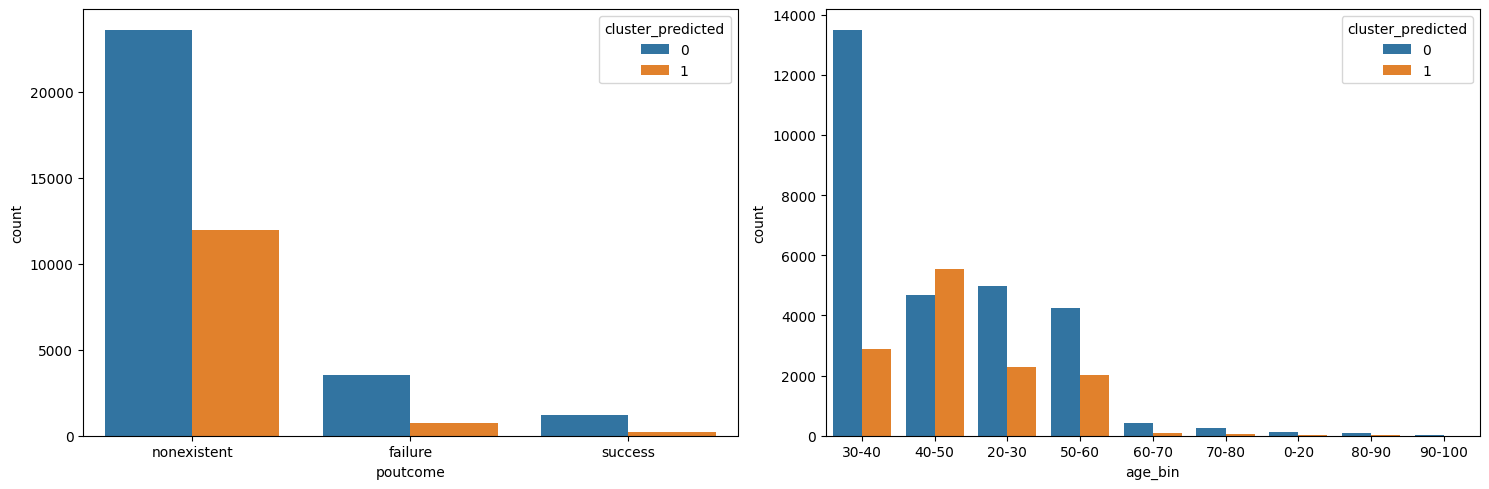

In [67]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['poutcome'],order=combinedDf['poutcome'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['age_bin'],order=combinedDf['age_bin'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

# conclusion
K-Modes clustering is particularly useful when dealing with categorical data, providing a robust method for grouping data points based on similarities in categorical features. Its ability to handle non-numeric data makes it a valuable tool in various fields such as market segmentation, customer profiling, and pattern recognition.

On the other hand, K-Means clustering is widely utilized for numeric data clustering, where it aims to partition data into K clusters by minimizing the variance within each cluster. Despite its popularity and efficiency, K-Means is sensitive to the initial selection of cluster centroids and may produce different results with each run, making it necessary to perform multiple iterations for validation.

Hierarchical Clustering, meanwhile, offers a different approach by forming a hierarchy of clusters, which can be visualized as a dendrogram. This method is particularly advantageous when the underlying structure of the data is not well-defined or when the number of clusters is not predetermined. Hierarchical clustering is less sensitive to initial conditions and can provide insights into the relationships between data points at different levels of granularity.